## 필요한 라이브러리를 설치합니다.

In [ ]:
! pip install numpy pandas scikit-learn matplotlib

## 라이브러리들을 불러 옵니다.

In [3]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

## 정상 데이터와 비정상 데이터를 가상으로 만듭니다.

In [4]:
# Example: Create synthetic data for illustration
rng = np.random.RandomState(42)
# Generate normal data (e.g., vibration readings)
X_normal = 0.3 * rng.randn(100, 2)
X_normal = np.r_[X_normal + 2, X_normal - 2]
# Generate some outliers
X_outliers = rng.uniform(low=-4, high=4, size=(20, 2))
# Combine data
X = np.r_[X_normal, X_outliers]
# Optionally, wrap the data in a DataFrame if you prefer:
df = pd.DataFrame(X, columns=['sensor1', 'sensor2'])

In [5]:
df

,sensor1,sensor2
0,2.149014,1.958521
1,2.194307,2.456909
2,1.929754,1.929759
3,2.473764,2.230230
4,1.859158,2.162768
...,...,...
215,-2.983516,0.177946
216,2.159948,-2.273432
217,0.983124,-3.317220
218,-3.586546,0.250837


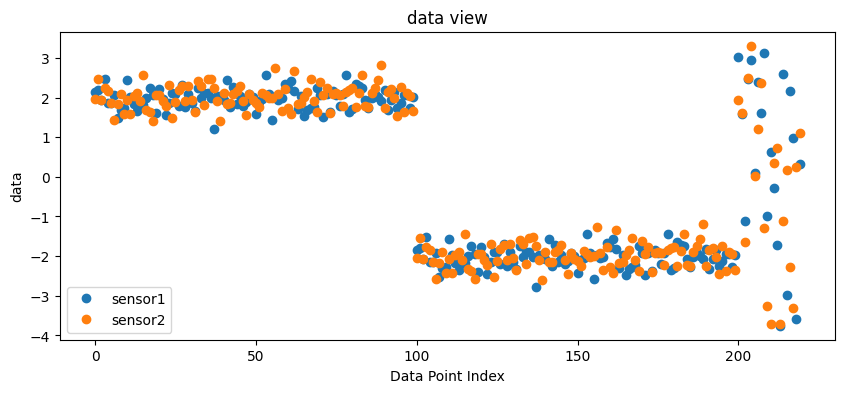

In [9]:
# Optional: Visualize the anomaly scores
plt.figure(figsize=(10, 4))
plt.plot(df, marker='o', linestyle='', label=df.columns)
plt.xlabel("Data Point Index")
plt.ylabel("data")
plt.title("data view")
plt.legend()
plt.show()


## Anomaly score를 계산합니다. (인공지능 적용)

* isolation forest 기법을 적용

In [13]:
# Define and train the Isolation Forest model.
# Here, contamination is the expected fraction of anomalies (10% in this case).
clf = IsolationForest(n_estimators=100, contamination=0.1, random_state=rng)
clf.fit(df)

# Compute the raw anomaly score using score_samples.
# Note: Higher scores in the raw output indicate more normal instances.
raw_scores = clf.score_samples(df)

# For a more intuitive anomaly score where higher values indicate a stronger anomaly,
# we invert the raw scores.
anomaly_scores = -raw_scores

# Get binary predictions (-1 indicates an anomaly, 1 indicates normal)
predictions = clf.predict(df)

In [14]:
# Display results
print("Raw scores (higher means more normal):")
print(raw_scores)
print("\nInverted anomaly scores (higher means more anomalous):")
print(anomaly_scores)
print("\nPredictions (-1: anomaly, 1: normal):")
print(predictions)

Raw scores (higher means more normal):
[-0.39567479 -0.43973362 -0.38576701 -0.4625295  -0.39169087 -0.39353101
 -0.44632054 -0.4539587  -0.39410011 -0.42823486 -0.43802322 -0.4231585
 -0.38600184 -0.40324911 -0.38778406 -0.46849881 -0.4075734  -0.43420431
 -0.45140279 -0.4113938  -0.40036102 -0.38335266 -0.42666089 -0.41104579
 -0.44476313 -0.38744281 -0.39942914 -0.44257912 -0.38938554 -0.40470075
 -0.39006555 -0.42881353 -0.44275864 -0.40154039 -0.39729665 -0.42434279
 -0.42743206 -0.57699503 -0.38628797 -0.45454533 -0.3864026  -0.44513991
 -0.39598029 -0.41231495 -0.39270763 -0.40568073 -0.39005843 -0.43210962
 -0.38601781 -0.38485125 -0.41991455 -0.40181793 -0.38788591 -0.48400217
 -0.38538727 -0.47693547 -0.50815903 -0.39115267 -0.40423505 -0.43216634
 -0.4254748  -0.48475901 -0.4890737  -0.40357175 -0.39439224 -0.42406868
 -0.40171635 -0.44870204 -0.38761922 -0.43170548 -0.42364173 -0.43593615
 -0.39560581 -0.4391784  -0.39543452 -0.38550106 -0.38910014 -0.39558501
 -0.48693408 

## 그래프로 그려봅시다.

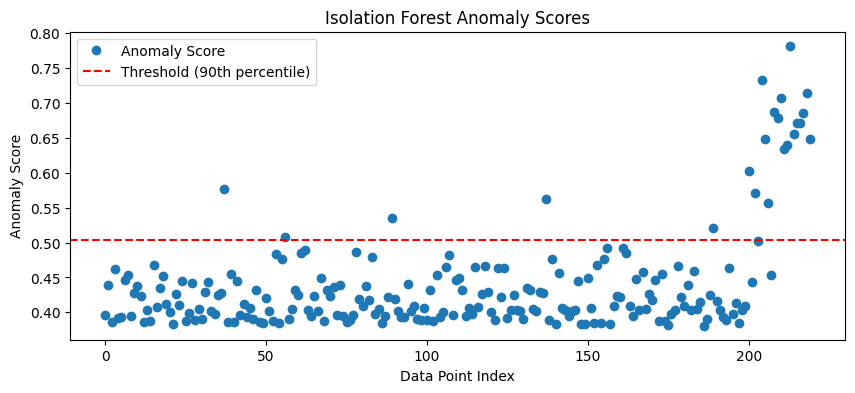

In [15]:
# Optional: Visualize the anomaly scores
plt.figure(figsize=(10, 4))
plt.plot(anomaly_scores, marker='o', linestyle='', label='Anomaly Score')
plt.axhline(y=np.percentile(anomaly_scores, 90), color='r', linestyle='--', label='Threshold (90th percentile)')
plt.xlabel("Data Point Index")
plt.ylabel("Anomaly Score")
plt.title("Isolation Forest Anomaly Scores")
plt.legend()
plt.show()
